## Pandas
Скачайте любой табличный датасет (можете использовать тот же, что и в дз к занятию "Знакомство с библиотеками"), например, с https://www.kaggle.com/datasets

Проведите поноценный EDA:

-"погрузитесь" в данные,

-составьте описание измерений из датасета,

-очистите данные, если это необходимо,

-попробуйте создать дополнительные переменные, которые могут помочь лучше понять данные

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Пути к директориям и файлам

In [2]:
TRAIN_DATASET_PATH = 'train.csv'

Загрузка данных

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


Приведение типов

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

меняем тип int на str

In [5]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

меняем тип float на int, т к эти данные должны быть целыми числами

In [6]:
train_df['Rooms'] = train_df['Rooms'].astype(int)
train_df['HouseFloor'] = train_df['HouseFloor'].astype(int)

удаляем столбец Id, он не нужен для работы

In [7]:
train_df = train_df.drop('Id', axis =1 )

Количественные переменные

In [8]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Качественные переменные

In [9]:
train_df.select_dtypes(include='object').columns.tolist()

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

подсчет количества значений по качественным переменным

In [10]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

In [11]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [13]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Обзор данных

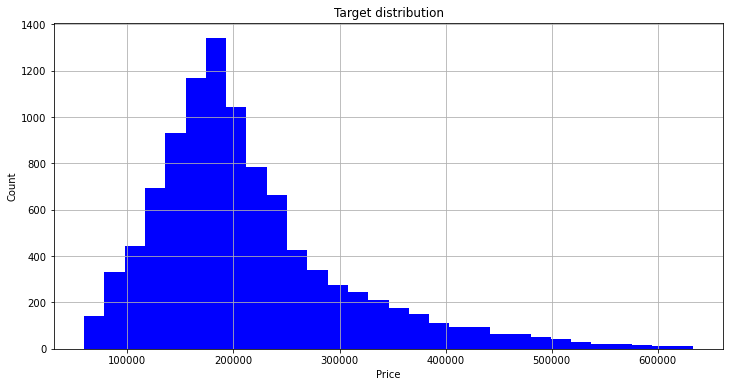

In [14]:
plt.figure(figsize=(12, 6))

train_df['Price'].hist(bins = 30, color='blue')
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

Обработка выбросов

In [15]:
train_df['Rooms'].value_counts()

2     3880
1     3705
3     2235
4      150
5       18
0        8
10       2
19       1
6        1
Name: Rooms, dtype: int64

In [16]:
median = train_df['Rooms'].median()
train_df.loc[(train_df['Rooms'] >= 6) | (train_df['Rooms'] == 0), 'Rooms'] = median

In [17]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.888400,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.811056,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,5.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [18]:
train_df.shape

(10000, 19)

In [19]:
median_sq = train_df['Square'].median()
train_df.loc[(train_df['Square'] >= 300) | (train_df['Square'] < 9), 'Square'] = median_sq

In [20]:
median_lifesq = train_df['LifeSquare'].median()
train_df.loc[(train_df['LifeSquare'] >= train_df['Square']) | (train_df['LifeSquare'] < 6), 'LifeSquare'] = median_lifesq

для обработки 'KitchenSquare' лучше применить среднее значение

In [21]:
kitsq = train_df['KitchenSquare'].mean()
train_df.loc[(train_df['KitchenSquare'] >= train_df['LifeSquare']) | (train_df['KitchenSquare'] == 0), 'KitchenSquare'] = kitsq

In [22]:
train_df.shape

(10000, 19)

In [23]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [24]:
floor_out = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

In [25]:
train_df.loc[floor_out, 'Floor'] = train_df.loc[floor_out, 'HouseFloor'].apply(lambda x: random.randint(1, x))

теперь данные нормализованы

In [26]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.888400,56.224584,35.120612,6.203087,7.418700,12.95910,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.811056,19.063483,14.806485,4.190706,5.032209,6.44346,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,1.000000,13.784865,8.822988,1.000000,1.000000,1.00000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.794392,23.453224,4.000000,3.000000,9.00000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.273300,6.000000,13.00000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.889736,42.775804,9.000000,11.000000,17.00000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,5.000000,275.645284,233.949309,112.000000,42.000000,117.00000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Обработаем пропуски

In [27]:
len(train_df) - train_df.count()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

есть пропуски по 'LifeSquare' и 'Healthcare_1'. Заполним их медианой

In [28]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()

проверим результат по пропускам

In [29]:
len(train_df) - train_df.count()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

пропуски отсутствуют

## Numpy


In [30]:
import numpy as np
import scipy as sp
import seaborn as sns
from scipy import integrate
from scipy import linalg

### №1 Вычислите A + B, A - B

In [31]:
A = np.array([[1, -2, 4],[2, 0, -1]])
A

array([[ 1, -2,  4],
       [ 2,  0, -1]])

In [32]:
B = np.array([[5, 2, 3], [4, 6, 2]])
B

array([[5, 2, 3],
       [4, 6, 2]])

In [33]:
C = A + B
C

array([[6, 0, 7],
       [6, 6, 1]])

In [34]:
C1 = A - B
C1

array([[-4, -4,  1],
       [-2, -6, -3]])

### № 2 Найдите матрицу С = A - 3B

In [35]:
A = np.array([[1,2],[2,-1],[3,0]])
A

array([[ 1,  2],
       [ 2, -1],
       [ 3,  0]])

In [36]:
B = np.array([[-1,1],[1,2],[0,0]])
B

array([[-1,  1],
       [ 1,  2],
       [ 0,  0]])

In [37]:
C = A - (B*3)
C

array([[ 4, -1],
       [-1, -7],
       [ 3,  0]])

### № 3 Вычислите С = AB

In [38]:
A = np.array([[1,-1],[2,0],[3,0]])
A

array([[ 1, -1],
       [ 2,  0],
       [ 3,  0]])

In [39]:
B = np.array([[1,1],[2,0]])
B

array([[1, 1],
       [2, 0]])

In [41]:
C = A.dot(B)
C

array([[-1,  1],
       [ 2,  2],
       [ 3,  3]])

### №4 Вычислите определитель матрицы А

In [42]:
A = np.array([[6,-1,4],[2,1,10],[8,0,2]])
A

array([[ 6, -1,  4],
       [ 2,  1, 10],
       [ 8,  0,  2]])

In [43]:
linalg.det(A)

-96.0

### №5 Вычислите матрицу, обратную матрице А. И покажите, что она действительно является обратной

In [46]:
A = np.array([[3,3,-1],[4,1,3],[1,-2,-2]])
A

array([[ 3,  3, -1],
       [ 4,  1,  3],
       [ 1, -2, -2]])

In [57]:
B = np.linalg.inv(A)
B

array([[ 0.07407407,  0.14814815,  0.18518519],
       [ 0.2037037 , -0.09259259, -0.24074074],
       [-0.16666667,  0.16666667, -0.16666667]])

In [58]:
B.shape

(3, 3)

In [59]:
linalg.det(B)

0.018518518518518517